In [1]:
import os
from dotenv import load_dotenv

import pandas as pd
from scipy.optimize import minimize
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

True

In [3]:
year = int(os.getenv("YEAR"))
year

2020

In [4]:
df = pd.read_csv(f'./out/{year}/data_clean_bert_skew_distrib_stars.csv')

## Creating a custom score

Let's create a custom score based on number of labels and stars. It should be a convex linear combination of the two and minimize the distance to both.

In [5]:
v1 = df['stars']
v2 = df['label']

In [6]:
def scalar_func(x):
  u = (x[0] * v1 + x[1] * v2)
  return norm(v1 - u)**2 + norm(v2 - u)**2

In [7]:
minimize(scalar_func, 
        [0.4, 0.4], 
        bounds=((0,1), (0,1)), 
        constraints=({'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1},)
)

     fun: 4253.0
     jac: array([0.00244141, 0.00268555])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.5, 0.5])

## Conclusion

The score should be 0.5 * label + 0.5 * stars

In [8]:
# Rename current score column to accuracy
df.rename(columns={'score': 'accuracy'}, inplace=True)
df.head(3)

,Unnamed: 0,eleve,classe,min,max,commentaire,label,accuracy,skew,delta,scale,location,shape,stars
0,0,17.8,14.28,8.30,17.8,"Un excellent début d'année, poursuivez ainsi !",5,0.756478,0.6150,0.937612,3.013959,12.025239,2.696742,5
1,1,15.0,14.51,11.00,19.5,Bon ensemble.,4,0.489843,-0.3700,-0.864044,2.761004,16.413456,-1.716358,3
2,2,10.6,10.87,5.47,16.7,Résultats corrects mais le comportement en cla...,3,0.775267,-0.1075,-0.668329,2.364184,12.130700,-0.898454,3


In [9]:
df['score'] = 0.5 * df['label'] + 0.5 * df['stars']
df

,Unnamed: 0,eleve,classe,min,max,commentaire,label,accuracy,skew,delta,scale,location,shape,stars,score
0,0,17.80,14.28,8.30,17.80,"Un excellent début d'année, poursuivez ainsi !",5,0.756478,0.6150,0.937612,3.013959,12.025239,2.696742,5,5.0
1,1,15.00,14.51,11.00,19.50,Bon ensemble.,4,0.489843,-0.3700,-0.864044,2.761004,16.413456,-1.716358,3,3.5
2,2,10.60,10.87,5.47,16.70,Résultats corrects mais le comportement en cla...,3,0.775267,-0.1075,-0.668329,2.364184,12.130700,-0.898454,3,3.0
3,3,15.50,14.24,6.00,19.00,Bon trimestre. Continuez ainsi !,4,0.485216,0.8700,0.983377,3.225933,11.708865,5.415736,4,4.0
4,4,14.75,12.67,6.00,18.25,Un bon trimestre.,4,0.472740,0.2725,0.816924,2.637196,10.951046,1.416440,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,6753,14.16,13.29,8.79,19.05,Un bon trimestre et une bonne implication en c...,4,0.593034,-0.3150,-0.839461,2.693428,15.094038,-1.544771,4,4.0
6610,6754,10.94,12.35,5.56,19.42,Ensemble juste convenable. Il faut approfondir...,4,0.512499,-0.0700,-0.600919,2.279042,13.442718,-0.751797,2,3.0
6611,6755,10.68,11.34,8.50,18.55,Un trimestre correcte.,3,0.475545,-1.0925,-1.011129,3.384822,14.070755,-6.758492,2,2.5
6612,6756,15.38,13.78,9.75,18.75,Bonne implication dans le travail mené en clas...,4,0.565291,-0.2350,-0.793593,2.584007,15.416181,-1.304288,4,4.0


In [10]:
# The score and label differe by less than one for 87% of the rows, and agrees 40% of the time
label_diff = abs(df['label']-df['score'])
label_diff.describe(), label_diff.quantile(0.41), label_diff.quantile(0.87)

(count    6614.000000
 mean        0.414122
 std         0.387351
 min         0.000000
 25%         0.000000
 50%         0.500000
 75%         0.500000
 max         1.500000
 dtype: float64,
 0.5,
 1.0)

In [11]:
# The score and stars differe by less than one for 87% of the rows and agrees 40% of the time
stars_diff = abs(df['stars']-df['score'])
stars_diff.describe(), stars_diff.quantile(0.4), stars_diff.quantile(0.86)

(count    6614.000000
 mean        0.414122
 std         0.387351
 min         0.000000
 25%         0.000000
 50%         0.500000
 75%         0.500000
 max         1.500000
 dtype: float64,
 0.5,
 1.0)

In [12]:
df['score'].value_counts()

4.0    1132
3.5     970
4.5     961
3.0     856
5.0     777
2.5     758
2.0     571
1.5     513
1.0      76
Name: score, dtype: int64

<AxesSubplot:title={'center':'stars'}, ylabel='Frequency'>

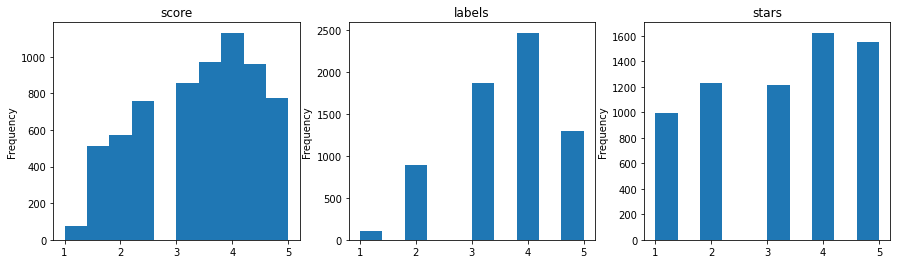

In [13]:
# Score has a nice repartition
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

df['score'].plot(kind="hist", ax=ax1, figsize=(15,4), title="score")
df['label'].plot(kind="hist", ax=ax2, figsize=(15,4), title="labels")
df['stars'].plot(kind="hist", ax=ax3, figsize=(15,4), title="stars")

In [14]:
df['rounded_score'] = df['score'].apply(lambda x: int(x))

In [15]:
df['rounded_score'].value_counts()

4    2093
3    1826
2    1329
5     777
1     589
Name: rounded_score, dtype: int64

<AxesSubplot:title={'center':'stars'}, ylabel='Frequency'>

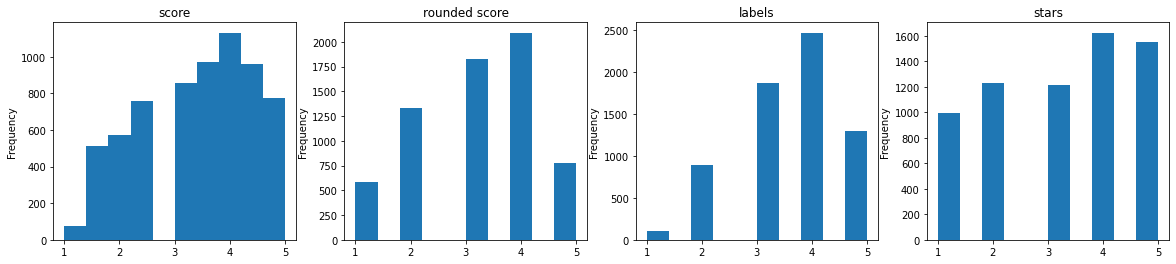

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

df['score'].plot(kind="hist", ax=ax1, figsize=(20,4), title="score")
df['rounded_score'].plot(kind="hist", ax=ax2, figsize=(20,4), title="rounded score")
df['label'].plot(kind="hist", ax=ax3, figsize=(20,4), title="labels")
df['stars'].plot(kind="hist", ax=ax4, figsize=(20,4), title="stars")


In [17]:
df.to_csv(f'./out/{year}/custom_rounded_score.csv', index=False)

In [18]:
df = pd.read_csv(f'./out/{year}/custom_rounded_score.csv')

## Strip columns for web

Only keep "commentaire" and "score" to gain space

In [19]:
df[["commentaire", "score"]].head()

,commentaire,score
0,"Un excellent début d'année, poursuivez ainsi !",5.0
1,Bon ensemble.,3.5
2,Résultats corrects mais le comportement en cla...,3.0
3,Bon trimestre. Continuez ainsi !,4.0
4,Un bon trimestre.,4.0


In [20]:
df[["commentaire", "score"]].to_csv(f'./out/{year}/custom_score_striped.csv', index=False)